In [1]:
# 1. 연도별 평균 설치 수 (2013, 2014, 2015, 2016) - 사무엘
# 2. 연도별로 제일 적게 CCTV 설치한 구 - 재정
# 3. 연도별로 제일 많이 CCTV 설치한 구 - 은서
# 4. 소계 Top 5 - 정희
# 5. 연도별 평균 대비? 증감량? - 가연
# 6. plt.scatter - 가연
# 7. 소계 (1000개 기준) 나누어서 그래프 - 기준 나눠서 하는거 찾아봄


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
plt.style.use(['ggplot'])
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
cctvArr = np.genfromtxt('data/CCTV_in_Seoul.csv',  dtype = None,
                        delimiter=',', encoding = 'UTF-8-sig', names =True)
cctvArr

array([('강남구', 2780, 1292, 430, 584, 932),
       ('강동구',  773,  379,  99, 155, 377),
       ('강북구',  748,  369, 120, 138, 204),
       ('강서구',  884,  388, 258, 184,  81),
       ('관악구', 1496,  846, 260, 390, 613),
       ('광진구',  707,  573,  78,  53, 174),
       ('구로구', 1561, 1142, 173, 246, 323),
       ('금천구', 1015,  674,  51, 269, 354),
       ('노원구', 1265,  542,  57, 451, 516),
       ('도봉구',  485,  238, 159,  42, 386),
       ('동대문구', 1294, 1070,  23, 198, 579),
       ('동작구', 1091,  544, 341, 103, 314),
       ('마포구',  574,  314, 118, 169, 379),
       ('서대문구',  962,  844,  50,  68, 292),
       ('서초구', 1930, 1406, 157, 336, 398),
       ('성동구', 1062,  730,  91, 241, 265),
       ('성북구', 1464, 1009,  78, 360, 204),
       ('송파구',  618,  529,  21,  68, 463),
       ('양천구', 2034, 1843, 142,  30, 467),
       ('영등포구',  904,  495, 214, 195, 373),
       ('용산구', 1624, 1368, 218, 112, 398),
       ('은평구', 1873, 1138, 224, 278, 468),
       ('종로구', 1002,  464, 314, 211, 630),
       (

In [4]:
# 1. 연도별 평균 설치 수 (2013, 2014, 2015, 2016) - 사무엘
print('소계 평균:', cctvArr['소계'].mean())
print('2013년도_이전 평균:', cctvArr['2013년도_이전'].mean())
print('2014년 평균:', cctvArr['2014년'].mean())
print('2015년 평균:', cctvArr['2015년'].mean())
print('2016년 평균:', cctvArr['2016년'].mean())

소계 평균: 1179.08
2013년도_이전 평균: 764.76
2014년 평균: 159.48
2015년 평균: 205.2
2016년 평균: 385.88


In [5]:
# 2. 연도별로 제일 적게 CCTV 설치한 구 - 재정
for i in cctvArr.dtype.names[2:]:
    print(i, cctvArr[cctvArr[i].argmin()][0], cctvArr[i].min(),sep='\t')

2013년도_이전	도봉구	238
2014년	송파구	21
2015년	양천구	30
2016년	강서구	81


In [6]:
# 3. 연도별로 제일 많이 CCTV 설치한 구  - 은서
mx2013 = cctvArr['2013년도_이전'].max(); mx2013
mx2014 = cctvArr['2014년'].max()
mx2015 = cctvArr['2015년'].max()
mx2016 = cctvArr['2016년'].max()
for a, b, c, d, e, f in cctvArr[cctvArr['2013년도_이전'] == mx2013]:
    print(f'2013년 이전 구 : {a}, CCTV 개수 : {b}')
for a, b, c, d, e, f in cctvArr[cctvArr['2014년'] == mx2014]:
    print(f'2014년 구 : {a}, CCTV 개수 : {b}')
for a, b, c, d, e, f in cctvArr[cctvArr['2015년'] == mx2015]:
    print(f'2015년 구 : {a}, CCTV 개수 : {b}')
for a, b, c, d, e, f in cctvArr[cctvArr['2016년'] == mx2016]:
    print(f'2016년 구 : {a}, CCTV 개수 : {b}')

2013년 이전 구 : 양천구, CCTV 개수 : 2034
2014년 구 : 강남구, CCTV 개수 : 2780
2015년 구 : 강남구, CCTV 개수 : 2780
2016년 구 : 강남구, CCTV 개수 : 2780


In [7]:
# 4. 소계 Top 5 - 정희
idx = np.argsort(cctvArr['소계'])[:-6:-1]
cctvArr[idx]

array([('강남구', 2780, 1292, 430, 584, 932),
       ('양천구', 2034, 1843, 142,  30, 467),
       ('서초구', 1930, 1406, 157, 336, 398),
       ('은평구', 1873, 1138, 224, 278, 468),
       ('용산구', 1624, 1368, 218, 112, 398)],
      dtype=[('기관명', '<U4'), ('소계', '<i4'), ('2013년도_이전', '<i4'), ('2014년', '<i4'), ('2015년', '<i4'), ('2016년', '<i4')])

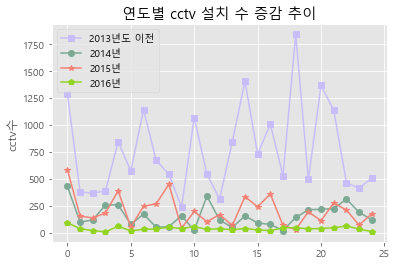

In [8]:
# 5. 연도별 설치 증감 추이
before2013 = cctvArr['2013년도_이전']
year2014 = cctvArr['2014년']
year2015 = cctvArr['2015년']
year2016 = cctvArr['2016년']*0.1

# 연도별 cctv 증감율 추이 그래프
ax = plt.gca()
plt.plot(before2013,marker = 's',color = '#c8bdfa')
plt.plot(year2014,marker = 'o', color = '#7ba993')
plt.plot(year2015,marker = '*',color = '#f48174')
plt.plot(year2016,marker = 'p',color = '#91d521')

plt.title('연도별 cctv 설치 수 증감 추이')
plt.ylabel('cctv수')
plt.legend(('2013년도 이전','2014년','2015년','2016년'))
plt.show()

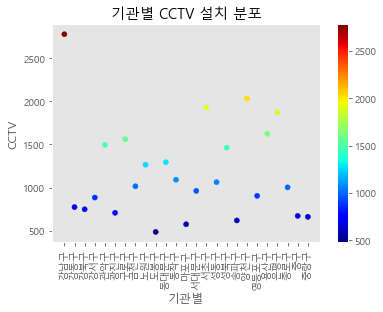

In [9]:
# 6. plt.scatterplt.scatter(cctvArr['기관명'],cctvArr['소계']) - 가연
x = cctvArr['기관명']
y = cctvArr['소계']
plt.xticks( rotation=90 ,fontsize = 10)
s1 = np.abs(26)

im = plt.scatter(x,y,s=s1,c=y,cmap='jet')
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))

plt.xlabel('기관별')
plt.ylabel('CCTV')
plt.colorbar(im)

plt.title('기관별 CCTV 설치 분포')
plt.grid()
plt.show()

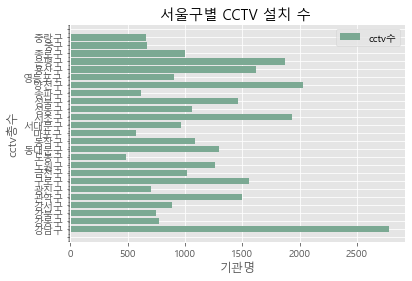

In [12]:
#7. 구별 CCTV 설치개수
ax=plt.axes()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

plt.xlabel('기관명')
plt.ylabel('cctv총수')
plt.title('서울구별 CCTV 설치 수 ')
zz = plt.barh(cctvArr['기관명'],cctvArr['소계'],color = '#7BA993')


plt.legend(['cctv수'])
plt.show()